Three-phased Current: Y and Delta configurations
================================================

This examples shows the computation of the voltage for the Y and Delta
configurations.


In [ ]:


import math

import numpy as np
import matplotlib.pyplot as plt


from PySpice.Unit import *




Let use an European 230 V / 50 Hz electric network.


In [ ]:

frequency = 50@u_Hz
w = frequency.pulsation
period = frequency.period

rms_mono = 230
amplitude_mono = rms_mono * math.sqrt(2)



The phase voltages in Y configuration are dephased of $\frac{2\pi}{3}$:

$$\begin{aligned}
V_{L1 - N} = V_{pp} \cos \left( \omega t \right) \\
V_{L2 - N} = V_{pp} \cos \left( \omega t - \frac{2\pi}{3} \right) \\
V_{L3 - N} = V_{pp} \cos \left( \omega t - \frac{4\pi}{3} \right)
\end{aligned}$$

We rewrite them in complex notation:

$$\begin{aligned}
V_{L1 - N} = V_{pp} e^{j\omega t} \\
V_{L2 - N} = V_{pp} e^{j \left(\omega t - \frac{2\pi}{3} \right) } \\
V_{L3 - N} = V_{pp} e^{j \left(\omega t - \frac{4\pi}{3} \right) }
\end{aligned}$$


In [ ]:

t = np.linspace(0, 3*float(period), 1000)
L1 = amplitude_mono * np.cos(t*w)
L2 = amplitude_mono * np.cos(t*w - 2*math.pi/3)
L3 = amplitude_mono * np.cos(t*w - 4*math.pi/3)



From these expressions, we compute the voltage in delta configuration
using trigonometric identities :

$$\begin{aligned}
V_{L1 - L2} = V_{L1} \sqrt{3} e^{j \frac{\pi}{6} } \\
V_{L2 - L3} = V_{L2} \sqrt{3} e^{j \frac{\pi}{6} } \\
V_{L3 - L1} = V_{L3} \sqrt{3} e^{j \frac{\pi}{6} }
\end{aligned}$$

In comparison to the Y configuration, the voltages in delta
configuration are magnified by a factor $\sqrt{3}$ and dephased of
$\frac{\pi}{6}$.

Finally we rewrite them in temporal notation:

$$\begin{aligned}
V_{L1 - L2} = V_{pp} \sqrt{3} \cos \left( \omega t + \frac{\pi}{6} \right) \\
V_{L2 - L3} = V_{pp} \sqrt{3} \cos \left( \omega t - \frac{\pi}{2} \right) \\
V_{L3 - L1} = V_{pp} \sqrt{3} \cos \left( \omega t - \frac{7\pi}{6} \right)
\end{aligned}$$


In [ ]:

rms_tri = math.sqrt(3) * rms_mono
amplitude_tri = rms_tri * math.sqrt(2)

L12 = amplitude_tri * np.cos(t*w + math.pi/6)
L23 = amplitude_tri * np.cos(t*w - math.pi/2)
L31 = amplitude_tri * np.cos(t*w - 7*math.pi/6)



Now we plot the waveforms:


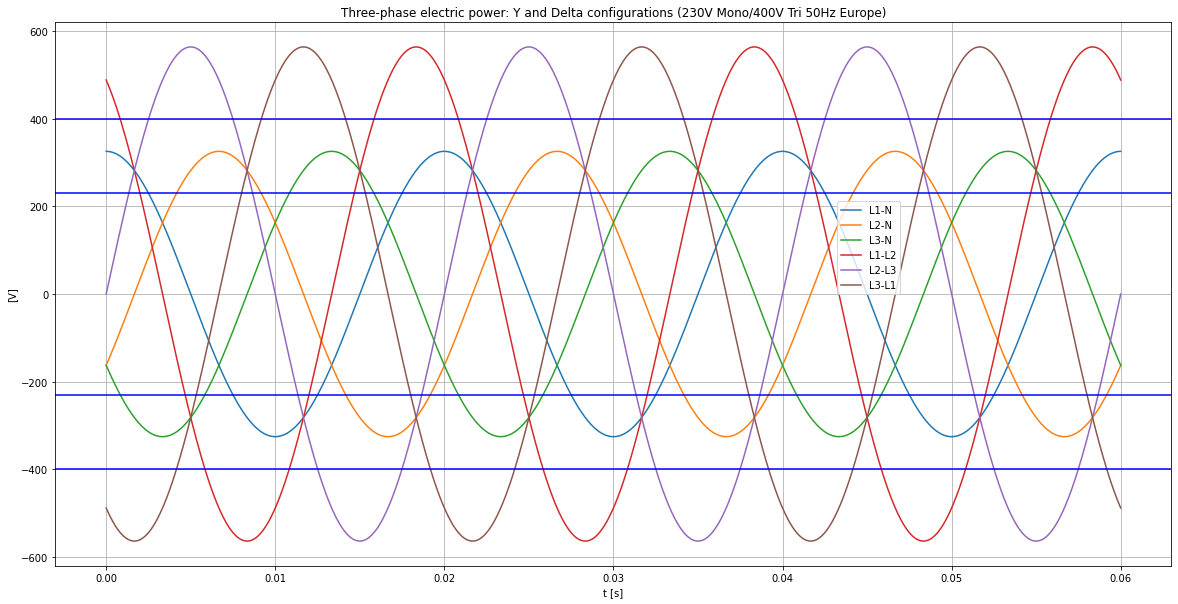

In [ ]:
figure, ax = plt.subplots(figsize=(20, 10))
ax.plot(
    t, L1, t, L2, t, L3,
    t, L12, t, L23, t, L31,
    # t, L1-L2, t, L2-L3, t, L3-L1,
)
ax.grid()
ax.set_title('Three-phase electric power: Y and Delta configurations (230V Mono/400V Tri 50Hz Europe)')
ax.legend(
    ('L1-N', 'L2-N', 'L3-N',
     'L1-L2', 'L2-L3', 'L3-L1'),
    loc=(.7,.5),
)
ax.set_xlabel('t [s]')
ax.set_ylabel('[V]')
ax.axhline(y=rms_mono, color='blue')
ax.axhline(y=-rms_mono, color='blue')
ax.axhline(y=rms_tri, color='blue')
ax.axhline(y=-rms_tri, color='blue')


